# Iris Flower Classification

## Objectives
Classify a new flower as belonging to one of the 3 classes given the 4 features.

In [90]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Data Loading

In [3]:
data = pd.read_csv('iris_dataset.csv')

In [9]:
(data
 ## uncomment on one method and comment on the rest of the methods
 #.head()
 #.info()
 #.shape
 .columns
)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

# Exploratory Data Analysis (EDA)

In [12]:
(data
 ## How many data points for each class are present? 
 #["species"].value_counts() # shows a balanced datasets; eaching having 50
 ## Checking if there are any NULL values
 #.isnull().sum() # There is no missing value
 
)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

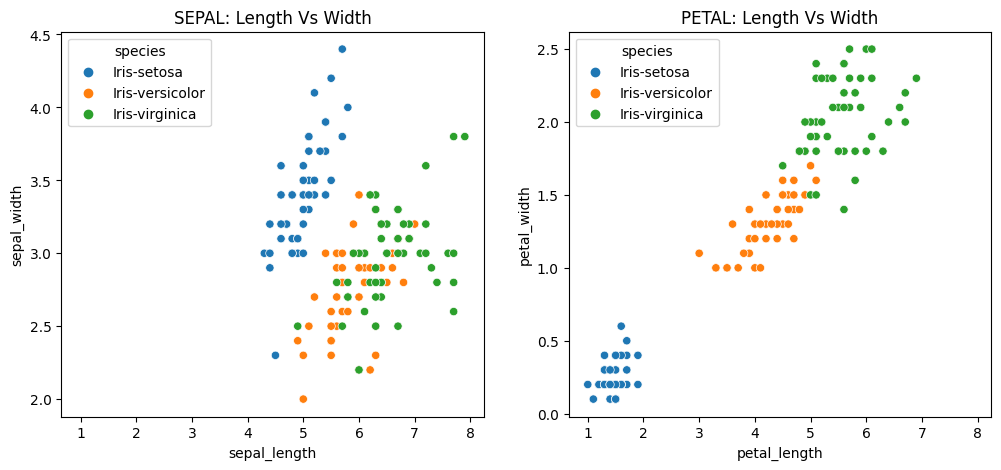

'\nNotice that the blue points can be easily seperated from red and green by drawing a line. \nBut red and green data points cannot be easily seperated.\n'

In [43]:
# Reference: https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(12,5))  # sharey =True to share axis, sharex=True no share
#sns.countplot(df.col1, x='col1', color="red", ax=axes[0])
#sns.countplot(df.col2, x="col2", color="green", ax=axes[1])
sns.scatterplot(data=data, x='sepal_length', y='sepal_width', hue='species', ax=axes[0])
sns.scatterplot(data=data, x='petal_length', y='petal_width', hue='species', ax=axes[1])
axes[0].set_title('SEPAL: Length Vs Width')
axes[1].set_title('PETAL: Length Vs Width')
plt.show()


"""
Notice that the blue points can be easily seperated from red and green by drawing a line. 
But red and green data points cannot be easily seperated.
"""

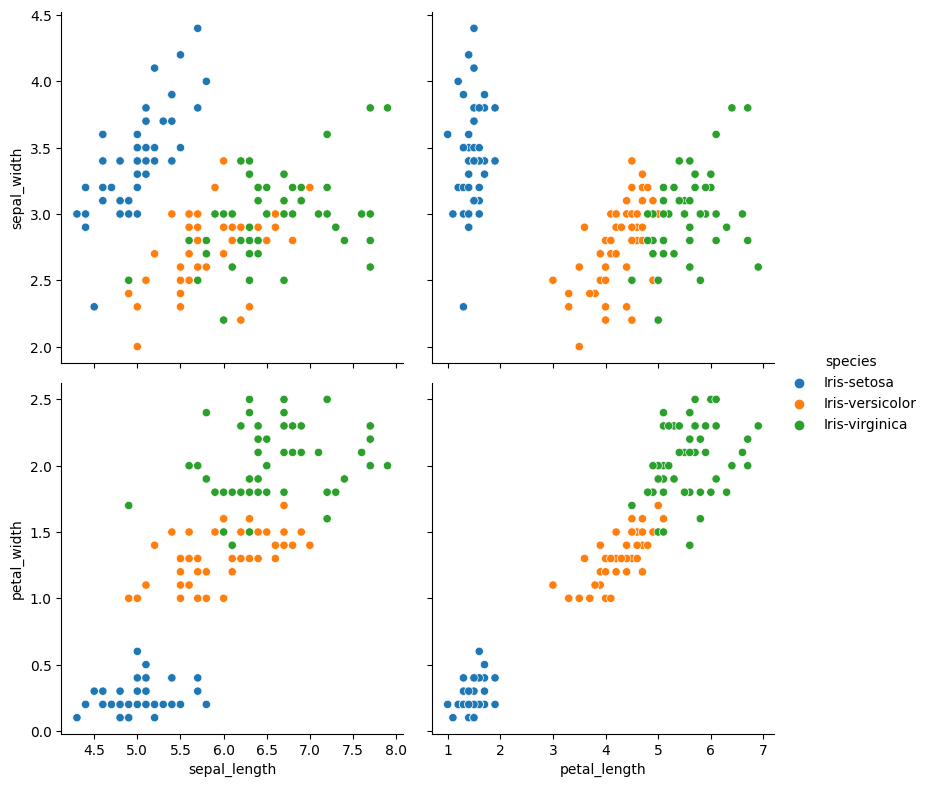

In [27]:
g = sns.PairGrid(data, y_vars=["sepal_width", "petal_width"], x_vars=["sepal_length", "petal_length"], height=4, hue="species")
g.map(sns.scatterplot, )
g.add_legend()

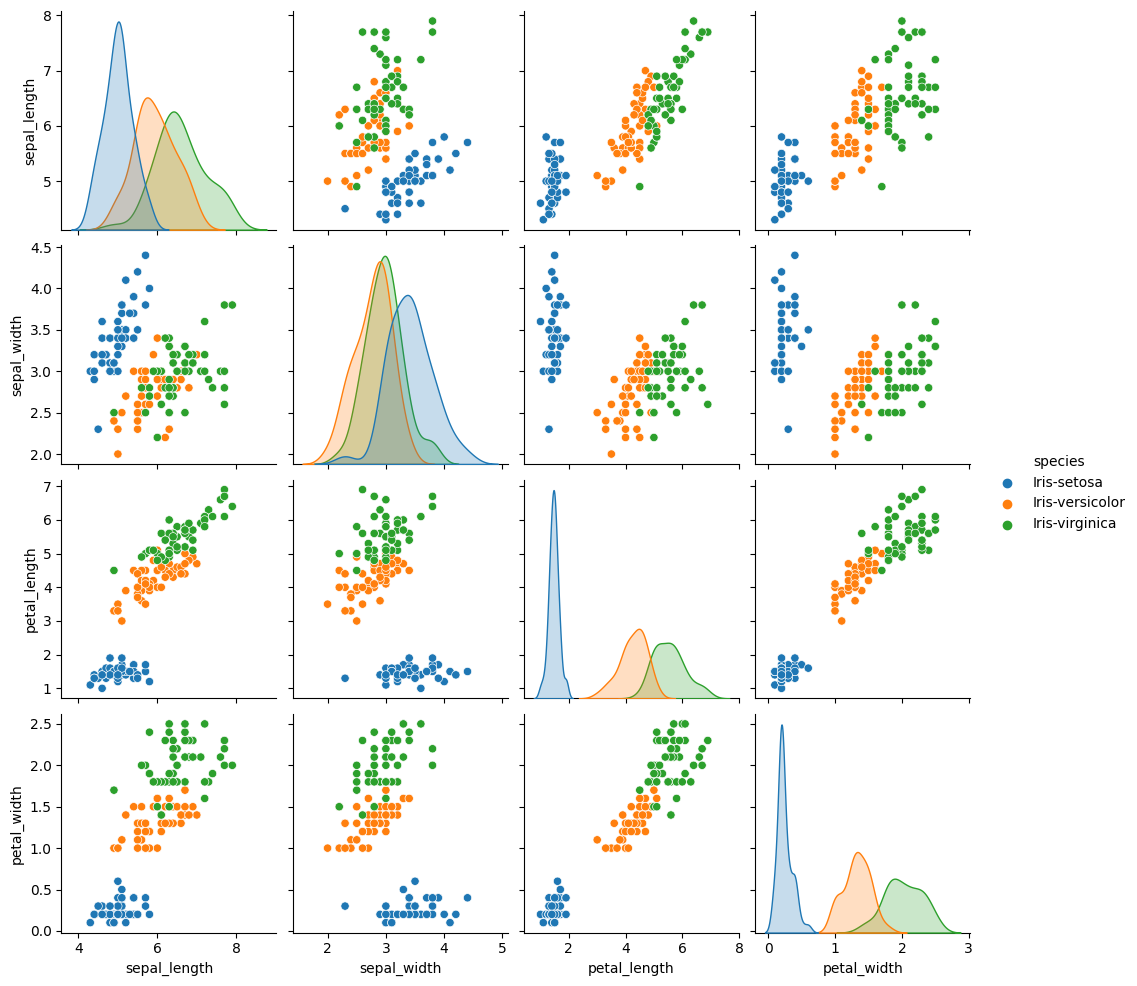

In [37]:
sb.pairplot(data, hue = 'species')#, palette = 'hls')

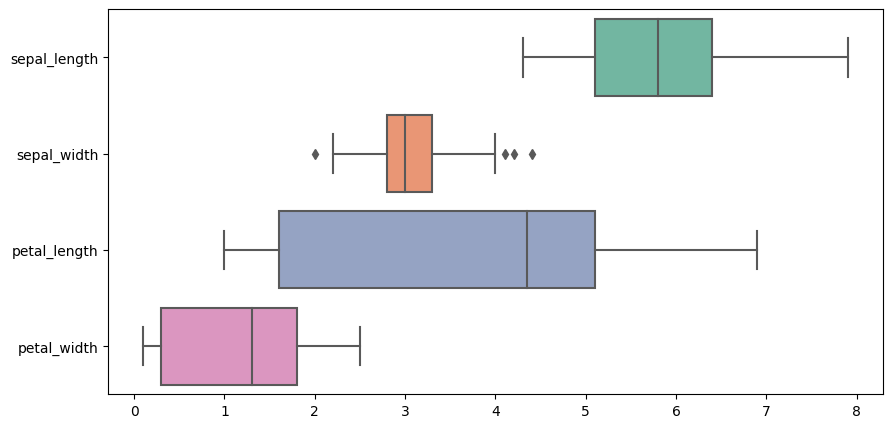

In [42]:
plt.figure(figsize=(10 ,5))
sns.boxplot(data=data, orient="h", palette="Set2")
plt.show()

# Splitting Dataset into Train and Test set

In [83]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

# Feature Scaling

In [84]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

# Selection of Models

In [85]:
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['SVM', SVC(random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['Naive Bayes', GaussianNB()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['XGBoost', XGBClassifier()])

In [92]:
lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    print(models[m][0])
    print(cm)
    print('\nAccuracy Score',accuracy_score(y_test, y_pred))
    print("\nMean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("\nStandard Deviation: {:.2f} %".format(accuracies.std()*100))
    print("\nSummary of the predictions made by the classifier:\n ",classification_report(y_test, y_pred))
    print('\n-----------------------------------')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_1.append(lst_2)

Logistic Regreesion
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Accuracy Score 1.0

Mean Accuracy: 95.00 %

Standard Deviation: 5.53 %

Summary of the predictions made by the classifier:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


-----------------------------------
SVM
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Accuracy Score 1.0

Mean Accuracy: 94.17 %

Standard Deviation: 6.51 %

Summary of the predictions made by the classifier:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy  

In [87]:
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'Mean Accuracy', 'Std. Deviation'])

In [88]:
df.sort_values(by= ['Accuracy', 'Mean Accuracy'], inplace= True, ascending= False)

In [89]:
df

,Model,Accuracy,Mean Accuracy,Std. Deviation
0,Logistic Regreesion,100.000000,95.000000,5.527708
1,SVM,100.000000,94.166667,6.508541
2,KNeighbors,100.000000,93.333333,6.236096
4,Decision Tree,100.000000,93.333333,5.000000
5,Random Forest,100.000000,93.333333,5.000000
6,XGBoost,100.000000,93.333333,5.000000
3,Naive Bayes,96.666667,95.000000,5.527708
